[TODO] Make some actual plots!!!

- PCA
- PCoA?
- Others?

In [4]:
# from headers import *
# from helpers import color_palette

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

import sklearn.decomposition # PCA
import sklearn.manifold # t-SNE
import phate

from itertools import count

In [35]:
def annotate(df, x_col, y_col):
    '''
    Use the index of a dataframe to label the points indicated by (x_co, y_col).
    df : pandas.DataFrame
    {x,y}_col : str
        A column in df.
        
    Example
    
        df = pd.DataFrame(pca_res, index=data.index)
        sns.scatterplot(data=df, x=pc1, y=pc2)
        annotate(df, pc1, pc2)
    '''
    for name, row in df.iterrows():
        x = row[x_col]
        y = row[y_col]
        plt.annotate(name, (x,y), zorder=99)  # Doesn't work by itself; you must include a scatter plot.
    return None

In [16]:
def PCA(data, **kwargs):
    pca_operator = sklearn.decomposition.PCA(**kwargs)
    Y_pca = pca_operator.fit_transform(data)
    df_pca = pd.DataFrame(Y_pca, index=DATA.index)
    new_cols = {v : 'PC{}'.format(i) for (i, v) in enumerate(df_pca.columns, start=1)}
    df_pca = df_pca.rename(columns=new_cols)
    ev = pd.Series({'PC{}'.format(i) : v for (i, v) in enumerate(pca_operator.explained_variance_ratio_, start=1)})
    return dict(data=df_pca, model=pca_operator, explained_variance=ev)

In [14]:
def tSNE(data, use_pca=False, pca_ncomp=5, **kwargs):
    
    # Scikit-learn's documentation of t-SNE explicitly states that:
    # It is highly recommended to use another dimensionality reduction 
    # method (e.g., PCA for dense data or TruncatedSVD for sparse data)
    # to reduce the number of dimensions to a reasonable amount 
    # (e.g., 50) if the number of features is very high. This will 
    # suppress some noise and speed up the computation of pairwise
    # distances between samples.
    if use_pca:
        pca_operator = sklearn.decomposition.PCA(n_components=pca_ncomp)
        tsne_operator = sklearn.manifold.TSNE(**kwargs)
        Y_tsne = tsne_operator.fit_transform(pca_operator.fit_transform(np.array(DATA)))
    else:
        tsne_operator = sklearn.manifold.TSNE(**kwargs)
        Y_tsne = tsne_operator.fit_transform(data)
        
    df_tsne = pd.DataFrame(Y_tsne, index=DATA.index)
    new_cols = {v : 'tSNE{}'.format(i) for (i, v) in enumerate(df_tsne.columns, start=1)}
    df_tsne = df_tsne.rename(columns=new_cols)
    return dict(data=df_tsne, model=tsne_operator)

In [15]:
def PHATE(data, **kwargs):
    # Create a new operator:
    phate_operator = phate.PHATE(**kwargs)

    Y_phate = phate_operator.fit_transform(sqrt_tpm)
    phate_operator.set_params(n_jobs=-2)
    Y_phate = phate_operator.fit_transform(data)
    df_phate = pd.DataFrame(Y_phate, index=data.index)
    new_cols = {v : 'tSNE{}'.format(i) for (i, v) in enumerate(df_phate.columns, start=1)}
    df_phate = df_phate.rename(columns=new_cols)
    return dict(data=df_phate, model=phate_operator)

In [17]:
def scree_plot(explained_variance, **kwargs):
    '''
    explained_variance : pandas.Series
    '''
    plt.bar(explained_variance.index, explained_variance.values, **kwargs)
    return None

# Shape

From the docs, it looks like PHATE wants samples in rows and attributes (genes) in columns.

```
fit(X)[source]
Computes the diffusion operator

Parameters:	X (array, shape=[n_samples, n_features]) ...
```

In [1]:
DATA = tpm.T

NameError: name 'tpm' is not defined

> ### Transformation

> In scRNA-seq analysis, the data is often $\log$-transformed. This typically requires the addition of some small value to avoid taking $\log(0)$. We avoid this issue entirely by instead taking the square root transform. The square root function has a similar form as the $\log$ function with the added benefit of being stable at 0.

In [15]:
sqrt_tpm = DATA.transform(np.sqrt)

gene_id,ENSG00000000003.14,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.12,ENSG00000001167.14,ENSG00000001460.18,...,ENSG00000286261.1,ENSG00000286262.1,ENSG00000286263.1,ENSG00000286264.1,ENSG00000286266.1,ENSG00000286268.1,ENSG00000286269.1,ENSG00000286270.1,ENSG00000286271.1,ENSG00000286272.1
Calu3_polyA_series1-S1-4h-A,9.598591,18.131588,3.431796,4.390658,0.0,2.043910,9.263715,5.314411,8.239079,1.954876,...,1.120991,1.179787,0.0,10.002311,0.0,6.675672,0.0,0.0,0.0,0.0
Calu3_polyA_series1-S1-4h-B,9.880707,18.145608,3.402295,4.478704,0.0,1.936186,9.111405,5.338635,8.153244,1.923465,...,0.847867,0.000000,0.0,9.690507,0.0,6.658108,0.0,0.0,0.0,0.0


<a id='embedding'></a>
## 3. Embedding Data Using PHATE

### 3.1 Instantiating the PHATE estimator

The API of PHATE models that of Scikit Learn. First, you instantiate a PHATE estimator object with the parameters for fitting the PHATE embedding to a given dataset. Next, you use the `fit` and `fit_transform` functions to generate an embedding. For more information, check out [**the PHATE readthedocs page**](http://phate.readthedocs.io/).

We'll just use the default parameters for now, but the following parameters can be tuned (read our documentation at [phate.readthedocs.io](https://phate.readthedocs.io/) to learn more):

* `knn` : Number of nearest neighbors (default: 5). Increase this (e.g. to 20) if your PHATE embedding appears very disconnected. You should also consider increasing `knn` if your dataset is extremely large (e.g. >100k cells)
* `decay` : Alpha decay (default: 15). Decreasing `decay` increases connectivity on the graph, increasing `decay` decreases connectivity. This rarely needs to be tuned. Set it to `None` for a k-nearest neighbors kernel.
* `t` : Number of times to power the operator (default: 'auto'). This is equivalent to the amount of smoothing done to the data. It is chosen automatically by default, but you can increase it if your embedding lacks structure, or decrease it if the structure looks too compact.
* `gamma` : Informational distance constant (default: 1). `gamma=1` gives the PHATE log potential, but other informational distances can be interesting. If most of the points seem concentrated in one section of the plot, you can try `gamma=0`.

Here's the simplest way to apply PHATE:

Since we are looking for subtle structure and we expect some of the trajectories to be sparse, we might want to decrease `knn` from the default of 5, and reduce `t` from the automatic value of 21 (printed in the output above). For single-cell RNA-seq you can try `knn` as low as 3 or 4 if you're looking for subtle structure, or as high as 30 or 40 if you have hundreds of thousands of cells. We'll also reduce `alpha` here to 15 to partially offset the decreased connectivity as a result of decreasing `knn`.

## Comparison with other visualization tools

In this section we will compare PHATE to other common visualization tools on this dataset.

* PCA
* t-SNE

Neither of these methods accept sparse input, so this will only work if you have a lot of memory available. Also, we apply PCA before t-SNE, as is common practice.

In [151]:
# PCA
start = time.time()

pca_operator = sklearn.decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(np.array(DATA))
df_pca = pd.DataFrame(Y_pca, index=DATA.index)
df_pca = df_pca.merge(attrs, left_index=True, right_index=True)

end = time.time()
print("Embedded PCA in {:.2f} seconds.".format(end-start))

# tSNE
start = time.time()

pca_operator = sklearn.decomposition.PCA(n_components=10)
tsne_operator = sklearn.manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(pca_operator.fit_transform(np.array(DATA)))
df_tsne = pd.DataFrame(Y_tsne, index=DATA.index)
df_tsne = df_tsne.merge(attrs, left_index=True, right_index=True)

end = time.time()
print("Embedded t-SNE in {:.2f} seconds.".format(end-start))

# PHATE
start = time.time()

# Create a new operator:
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)

Y_phate = phate_operator.fit_transform(sqrt_tpm)
phate_operator.set_params(n_jobs=-2)
Y_phate = phate_operator.fit_transform(DATA)
df_phate = pd.DataFrame(Y_phate, index=DATA.index)
df_phate = df_phate.merge(attrs, left_index=True, right_index=True)

end = time.time()
print("Embedded PHATE in {:.2f} seconds.".format(end-start))

Embedded PCA in 0.20 seconds.
Embedded t-SNE in 1.15 seconds.
Embedded PHATE in 0.01 seconds.


# plot everything

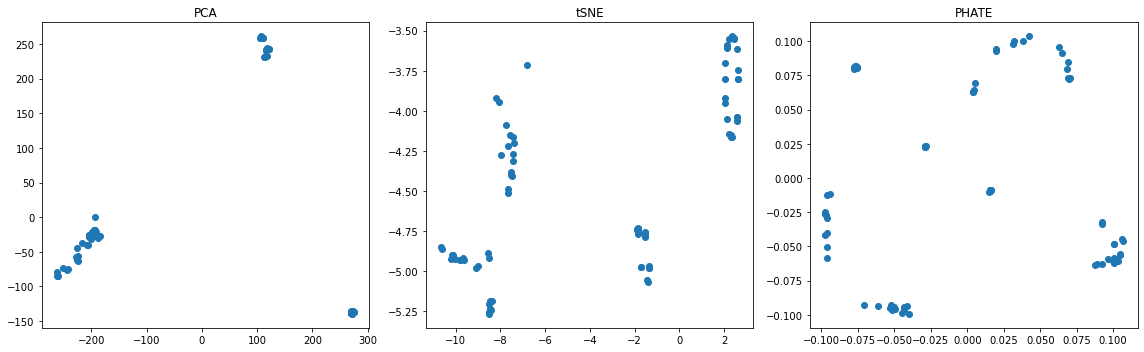

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

#plotting PCA
# scprep.plot.scatter2d(Y_pca, label_prefix="PC", title="PCA",
#                       c=sample_labels, ticks=False, cmap='Spectral', ax=ax1)
plt.subplot(1,3,1)
plt.scatter(x=Y_pca[:, 0], y=Y_pca[:, 1])
plt.title('PCA')

#plotting tSNE
# scprep.plot.scatter2d(Y_tsne, label_prefix="t-SNE", title="t-SNE", legend=False,
#                       c=sample_labels, ticks=False, cmap='Spectral', ax=ax2)
plt.subplot(1,3,2)
plt.scatter(x=Y_tsne[:, 0], y=Y_tsne[:, 1])
plt.title('tSNE')

#plotting PHATE
# scprep.plot.scatter2d(Y_phate, label_prefix="PHATE", title="PHATE", legend=False,
#                       c=sample_labels, ticks=False, cmap='Spectral', ax=ax3)
plt.subplot(1,3,3)
plt.scatter(x=Y_phate[:, 0], y=Y_phate[:, 1])
plt.title('PHATE')

plt.tight_layout()
plt.show()

# Plot each of them using various metadata fields to color the markers

In [6]:
attrs['cellline_timepoint'] = attrs['Sample_characteristics_ch1_cell_line'] + '_' + attrs['Sample_characteristics_ch1_time_point']

# plot everything
n_rows = 3
n_cols = 3
width = n_cols*6
height=n_rows*5
plt.subplots(n_rows,n_cols, figsize=(width, height))
subplot = count(start=1)

# Row 1
attribute = 'Sample_characteristics_ch1_cell_line'
for name, df in dict(PCA=df_pca, tSNE=df_tsne, PHATE=df_phate).items():
    plt.subplot(n_rows,n_cols,next(subplot))
    sns.scatterplot(data=df, x=0, y=1, hue=attrs[attribute])
    if name == 'PCA':
        plt.gca().legend(loc='center right')
    else:
        plt.gca().get_legend().remove()
    plt.title(name)

# Row 2
# attribute = 'Sample_characteristics_ch1_time_point'
attribute = 'cellline_timepoint'
for name, df in dict(PCA=df_pca, tSNE=df_tsne, PHATE=df_phate).items():
    plt.subplot(n_rows,n_cols,next(subplot))
    sns.scatterplot(data=df, x=0, y=1, hue=attrs[attribute])
    if name == 'PCA':
        plt.gca().legend(loc='center right')
    else:
        plt.gca().get_legend().remove()


# Row 3
attribute = 'Sample_characteristics_ch1_infection'
for name, df in dict(PCA=df_pca, tSNE=df_tsne, PHATE=df_phate).items():
    plt.subplot(n_rows,n_cols,next(subplot))
    sns.scatterplot(data=df, x=0, y=1, hue=attrs[attribute])
    if name == 'PCA':
        plt.gca().legend(loc='center right')
    else:
        plt.gca().get_legend().remove()

plt.tight_layout()
plt.show()

# Playing with some options for PHATE

/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/graphtools/graphs.py:118: UserWarning: Building a kNNGraph on data of shape (78, 45057) is expensive. Consider setting n_pca.
  warnings.warn(
/ccs/home/millerji/miniconda3/envs/cov-single-cell/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_neighbors=78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnin

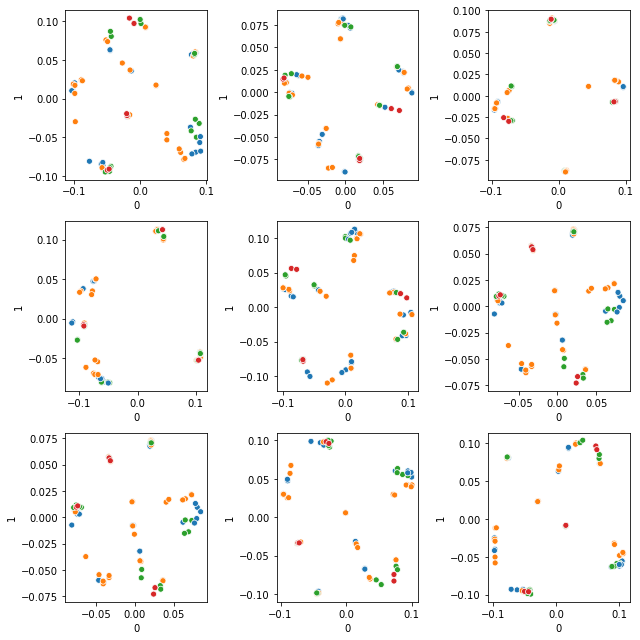

In [144]:
n_rows = 3
n_cols = 3
subplot = count(start=1)
height=n_rows*3
width=n_cols*3
plt.subplots(n_rows, n_cols, figsize=(width, height))

for knn in [2,4,8]:
    phate_operator.set_params(knn=knn, n_jobs=-2, verbose=False)
    Y_phate = phate_operator.fit_transform(DATA)
    df_phate = pd.DataFrame(Y_phate, index=DATA.index)
    df_phate = df_phate.merge(attrs, left_index=True, right_index=True)
    
    plt.subplot(n_rows, n_cols, next(subplot))
    sns.scatterplot(data=df_phate, x=0, y=1, hue=attrs[attribute], legend=False)

for decay in [5,15,40]:
    phate_operator.set_params(knn=2, decay=decay, n_jobs=-2, verbose=False)
    Y_phate = phate_operator.fit_transform(DATA)
    df_phate = pd.DataFrame(Y_phate, index=DATA.index)
    df_phate = df_phate.merge(attrs, left_index=True, right_index=True)
    
    plt.subplot(n_rows, n_cols, next(subplot))
    sns.scatterplot(data=df_phate, x=0, y=1, hue=attrs[attribute], legend=False)
    
for t in [2,3,4]:
    phate_operator.set_params(knn=2, decay=40, t=t, n_jobs=-2, verbose=False)
    Y_phate = phate_operator.fit_transform(DATA)
    df_phate = pd.DataFrame(Y_phate, index=DATA.index)
    df_phate = df_phate.merge(attrs, left_index=True, right_index=True)
    
    plt.subplot(n_rows, n_cols, next(subplot))
    sns.scatterplot(data=df_phate, x=0, y=1, hue=attrs[attribute], legend=False)

plt.tight_layout()